In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def load_csv(file_link):
    demo = pd.read_csv(file_link, nrows = 15)
    dt = {}
    for col, name in zip(demo.columns, demo.dtypes):
        dt[col] = name
    df = pd.read_csv(file_link, dtype = dt)
    return df

In [3]:
path = '/Users/mike/vcs/github.com/frostyotter/EDA-practices/data/Shop_Customers_Data.csv'
df = load_csv(path)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
print(df.isnull().sum())
print('dataframe shape:', df.shape)

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64
dataframe shape: (2000, 8)


In [6]:
df['Profession'].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

Maybe, 35 people did not want to disclose about their job or they are just unemployed at the moment  
So it would be best to assign them as "unknown"

In [7]:
df.fillna("Unknown", axis=1, inplace =True)

In [8]:
df.describe()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,2,100,1786,101,10,18,9
top,1,Female,31,50000,49,Artist,1,2
freq,1,1186,31,7,34,612,470,361


In [9]:
df.dtypes

CustomerID                object
Gender                    object
Age                       object
Annual Income ($)         object
Spending Score (1-100)    object
Profession                object
Work Experience           object
Family Size               object
dtype: object

In [10]:
df.drop('CustomerID',axis = 1, inplace=True)

In [11]:
numeric_col = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
df[numeric_col] = df[numeric_col].astype(int)

In [12]:
df.dtypes

Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [13]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


We better get rid of those 0

In [14]:
df = df[df['Age'] != 0]

In [15]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,49.554656,110677.548583,50.900304,4.104251,3.764676
std,28.081834,45773.566639,27.911754,3.919088,1.968045
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,26.000000,74572.000000,28.000000,1.000000,2.000000
50%,49.000000,109660.500000,50.000000,3.000000,4.000000
75%,74.000000,149136.500000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [16]:
np.sort(df['Age'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

This data is so weird, there are customers whose age only around 1-5  
I'll group these customers age by group for a better view

In [18]:
bins = [0, 12, 18, 59, 99]
group_names = ['Child', 'Adolescence', 'Adult','Senior Adult']
df['Age'] = pd.cut(df['Age'], bins, labels=group_names)

In [118]:
def count_plot(data, col_name = None, figsize = (10, 5)):

    if isinstance(col_name, list):
        plt.figure(figsize = figsize)
        df_cnt = (data.groupby([col_name[0]])[col_name[1]]
                    .value_counts(normalize = True)
                    .reset_index(name ='Count'))
        
        sns.barplot(data = df_cnt, x = col_name[0], y= 'Count', hue = col_name[1], palette='Blues')
        plt.title(f'Count plot of {col_name[0]} with {col_name[1]} (percent)')
        plt.show()
        
    else:
        plt.figure(figsize=figsize)
        df_cnt = np.round(data[col_name].value_counts(normalize = True)*100)
        plt.bar(x = df_cnt.index, height = df_cnt)
        plt.title(f'{col_name} count')
        plt.xlabel(f'{col_name}')
        plt.ylabel('Count (percent)')
        plt.show()

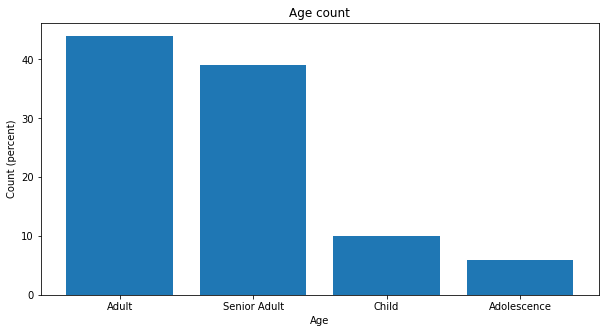

In [81]:
count_plot(df, 'Age')

Adults and Senior Adults are the most customers

In [28]:
(df.loc[:,['Annual Income ($)', 'Spending Score (1-100)','Work Experience','Family Size']] == 0).sum()

Annual Income ($)           2
Spending Score (1-100)      2
Work Experience           426
Family Size                 0
dtype: int64

So there are 2 people that were not buy any


In [29]:
df = df[df['Spending Score (1-100)'] != 0]

In [30]:
df.shape

(1974, 7)

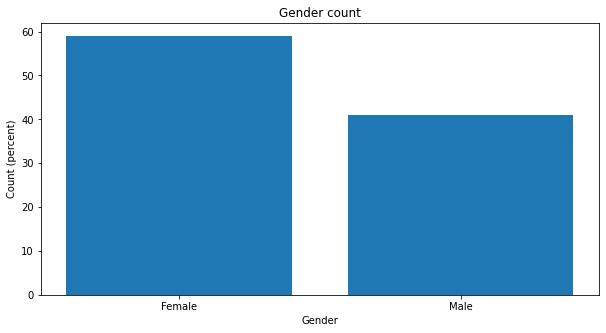

In [53]:
count_plot(df, 'Gender')

Female tend to buy more than Male

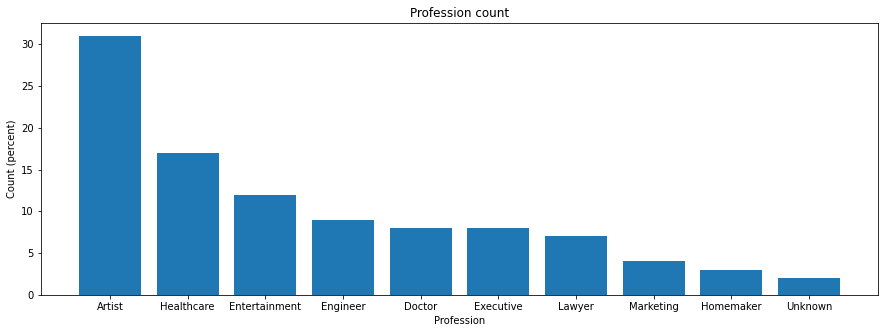

In [55]:
count_plot(df, 'Profession', figsize=(15, 5))

Most customers were Artist and in Healthcare industry

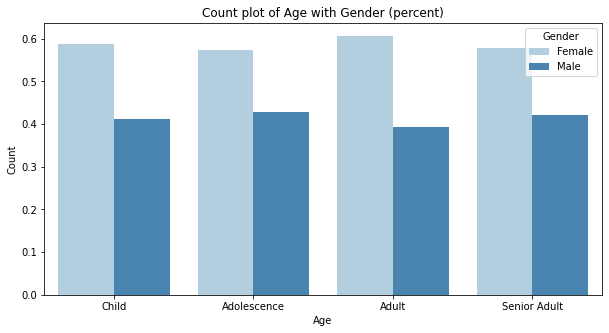

In [119]:
count_plot(df, ['Age', 'Gender'], figsize = (10, 5))

In [164]:
def spending_by(data, col_name = None, figure = (10, 5)):
    if isinstance(col_name, list):
        sns.kdeplot(data = data, x = col_name[0], hue = col_name[1], palette='cool', cumulative=True)
        plt.xlim([0, 100])
        plt.tight_layout()
        plt.show()

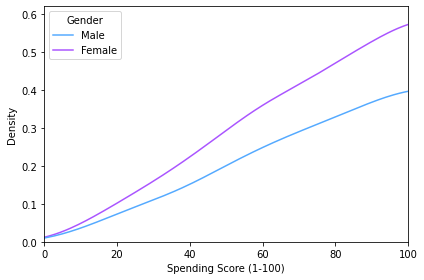

In [165]:
spending_by(df, ['Spending Score (1-100)', 'Gender'])

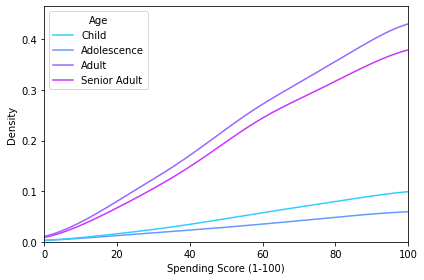

In [166]:
spending_by(df, ['Spending Score (1-100)', 'Age'])

Same as countplot, where female made purchases more than male,  
same goes for adults and senior adults

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


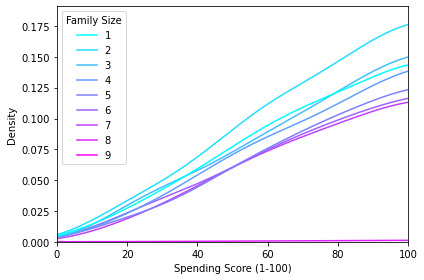

In [167]:
spending_by(df, ['Spending Score (1-100)', 'Family Size'])

The bigger family size, the less purchases were made

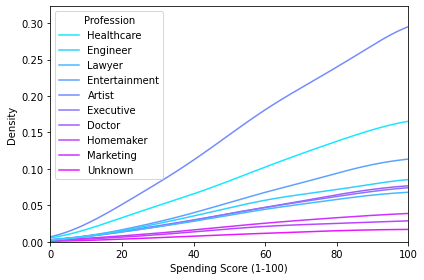

In [168]:
spending_by(df, ['Spending Score (1-100)', 'Profession'])

Pretty much same as countplot

This data seem to be artificial